In [1]:
import nltk
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\qkfkd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [2]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
# 파일 제목을 읽어옴

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
doc_alice = gutenberg.open("carroll-alice.txt").read()
print("# Num of characters used : ", len(doc_alice))
print("# Text sample : ")
print(doc_alice[:500])

# Num of characters used :  144395
# Text sample : 
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [4]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice) # 토큰화 실행

print("# Num of characters used : ", len(tokens_alice))
print("# Tokens sample : ")
print(tokens_alice[:500])

# Num of characters used :  33494
# Tokens sample : 
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth', 't

In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# 모든 토큰에 대해 스테밍 실행

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print(" #Num of tokens after lemmatization : ", len(lem_tokens_alice))
print(" #Token sample  : ")
print(lem_tokens_alice[:20])

 #Num of tokens after lemmatization :  33494
 #Token sample  : 
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}") 

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [14]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [15]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word,0) + 1
    
print(" #Num of used words : ", len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print( " Top 20 high frequency words : ")
for key in sorted_word_count[:20] : # 빈도수 상위 20개의 단어를 출력
    print(f"{repr(key)} : {alice_word_count[key]}", end = ", ")

 #Num of used words :  2687
 Top 20 high frequency words : 
'said' : 462, 'alice' : 385, 'little' : 128, 'one' : 98, 'know' : 88, 'like' : 85, 'went' : 83, 'would' : 78, 'could' : 77, 'thought' : 74, 'time' : 71, 'queen' : 68, 'see' : 67, 'king' : 61, 'began' : 58, 'turtle' : 57, "'and" : 56, 'way' : 56, 'mock' : 56, 'quite' : 55, 

In [28]:
test_dict = dict()

In [23]:
result_alice[:5]

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll']

In [31]:
test_dict["alice's"] = test_dict.get(result_alice[0],1)

In [32]:
test_dict

{"alice's": 1}

In [33]:
test_dict.get

<function dict.get(key, default=None, /)>

In [45]:
my_tag_set = ["NN", "VB", "VBD","JJ"]
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

In [46]:
result_alice[:5]

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll']

In [47]:
nltk.pos_tag(result_alice)[:5]

[("alice's", 'NN'),
 ('adventures', 'NNS'),
 ('wonderland', 'VBP'),
 ('lewis', 'RB'),
 ('carroll', 'JJ')]

In [49]:
alice_word_count = dict()

for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print(" #Num of used words : ", len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print("#Top 20 high frequency words :")
for key in sorted_word_count[:20]:
    print(f"{repr(key)} : {alice_word_count[key]}", end = ", ")

 #Num of used words :  1726
#Top 20 high frequency words :
'said' : 462, 'alice' : 293, 'little' : 124, 'went' : 83, 'time' : 71, 'queen' : 66, 'began' : 58, 'way' : 56, 'turtle' : 56, 'mock' : 55, 'thought' : 54, 'thing' : 49, 'voice' : 48, 'head' : 46, 'gryphon' : 45, 'got' : 44, 'rabbit' : 42, 'looked' : 42, 'see' : 42, 'came' : 40, 

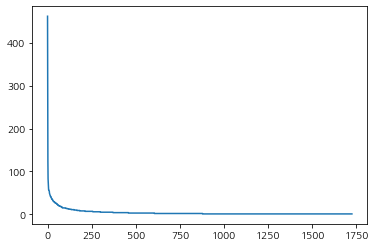

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성

w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

<BarContainer object of 20 artists>

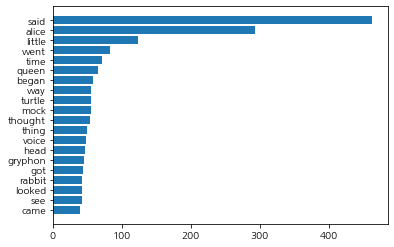

In [52]:
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [alice_word_count[key] for key in n]

plt.barh(range(len(n)), w, tick_label = n)

<BarContainer object of 20 artists>

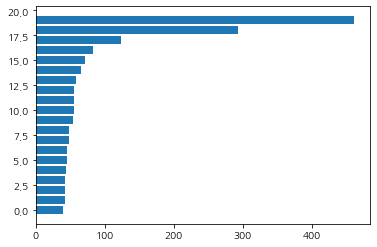

In [53]:
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [alice_word_count[key] for key in n]

plt.barh(range(len(n)), w)


In [55]:
w

[40,
 42,
 42,
 42,
 44,
 45,
 46,
 48,
 49,
 54,
 55,
 56,
 56,
 58,
 66,
 71,
 83,
 124,
 293,
 462]

AttributeError: 'AxesImage' object has no property 'interploateion'

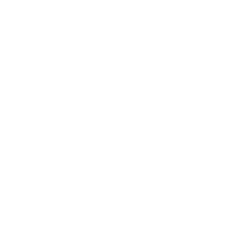

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interploateion = "bilinear")